<a href="https://colab.research.google.com/github/jonjimenez99/Portafolio/blob/feature%2Fproyectos_antiguos/Reto_Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Limpieza del Data Frame

In [ ]:
print('El tamaño del dataset de train es ' + str(df_train.shape) + ' y del dataset de test es de ' + str(df_test.shape))

El tamaño del dataset de train es (891, 12) y del dataset de test es de (418, 11)


## Valores nulos

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Se decide eliminar la columna "Cabin" y los valores nulos de la columna "Age"

In [ ]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [ ]:
print('El tamaño del dataset de train después de eliminar nulos es ' + str(df_train.shape) + ' y del dataset de test es de ' + str(df_test.shape))

El tamaño del dataset de train después de eliminar nulos es (712, 11) y del dataset de test es de (331, 10)


## Distribución de los datos

In [ ]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


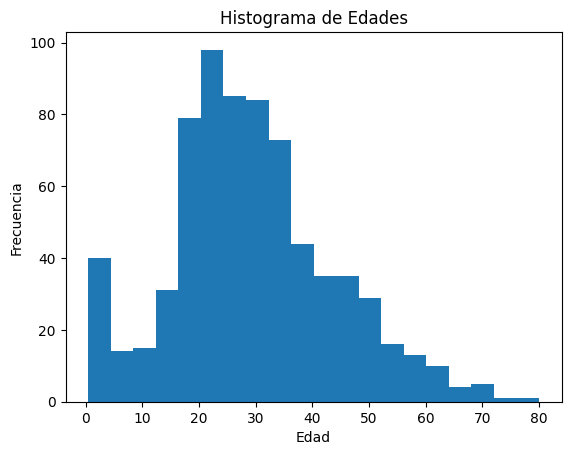

In [ ]:
# Crear el histograma
plt.hist(df_train['Age'], bins=20)

# Personalizar el gráfico
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')

# Mostrar el gráfico
plt.show()

In [ ]:
print('La media de edad, es ' + str(df_train['Age'].mean()) + ' y la mediana es '+ str(df_train['Age'].median()))

La media de edad, es 29.64209269662921 y la mediana es 28.0


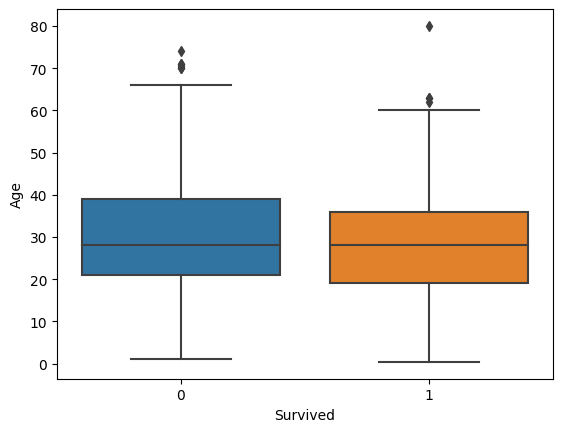

In [ ]:
sns.boxplot(data=df_train, y='Age', x='Survived')
plt.show()

In [ ]:
print('La media de edad, es ' + str(df_train[df_train['Survived']==1].Age.mean()) + 'Y la media de edad de quienes no sobrevivieron, es ' + str(df_train[df_train['Survived']==0].Age.mean()))

La media de edad, es 28.19329861111111Y la media de edad de quienes no sobrevivieron, es 30.62617924528302


In [ ]:
pivot_table = df_train.groupby(["Sex"])["Survived"].count().reset_index(name='Count').sort_values(["Count"], ascending = False)
pivot_table

,Sex,Count
1,male,453
0,female,259


In [ ]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
feature_selection = ['Survived','Pclass','Sex','Age','Embarked']
df_train = df_train[feature_selection]

In [ ]:
df_train = pd.get_dummies(df_train, columns=["Sex", "Embarked","Pclass"])

In [ ]:
df_train.head(1)

,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1,0,0,1


In [ ]:
df_train = df_train.dropna()

# Normalizando la columna Age

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar la columna "edad"
df_train['Age'] = scaler.fit_transform(df_train[['Age']])

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Dividir los datos en características (X) y variable objetivo (y)
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar varios modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular las métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcular la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

    # Crear un DataFrame para mostrar la matriz de confusión
    labels = ['Negativo', 'Positivo']
    confusion_df = pd.DataFrame(confusion, index=labels, columns=labels)

    # Imprimir el nombre del modelo y las métricas de evaluación
    print(f"Modelo: {model_name}")
    print(f"Precisión: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Precisión: {accuracy}")
    print()

    # Imprimir la matriz de confusión
    print(f"Matriz de confusión:")
    print(confusion_df)
    print()

Modelo: Logistic Regression
Precisión: 0.84
Recall: 0.6666666666666666
F1-Score: 0.743362831858407
Precisión: 0.7972027972027972

Matriz de confusión:
          Negativo  Positivo
Negativo        72         8
Positivo        21        42

Modelo: Decision Tree
Precisión: 0.7872340425531915
Recall: 0.5873015873015873
F1-Score: 0.6727272727272727
Precisión: 0.7482517482517482

Matriz de confusión:
          Negativo  Positivo
Negativo        70        10
Positivo        26        37

Modelo: Random Forest
Precisión: 0.8
Recall: 0.6984126984126984
F1-Score: 0.7457627118644068
Precisión: 0.7902097902097902

Matriz de confusión:
          Negativo  Positivo
Negativo        69        11
Positivo        19        44

Modelo: Support Vector Machine
Precisión: 0.85
Recall: 0.5396825396825397
F1-Score: 0.6601941747572816
Precisión: 0.7552447552447552

Matriz de confusión:
          Negativo  Positivo
Negativo        74         6
Positivo        29        34

Modelo: K-Nearest Neighbors
Precisión

# Evaluación sobre datos de Test

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Cargar el nuevo dataset
df_test = pd.read_csv('/content/test.csv')

KeyError: ignored

In [ ]:
feature_selection_prediction = ['Pclass','Sex','Age','Embarked']


In [ ]:
# Preprocesamiento de datos (asegúrate de aplicar las mismas transformaciones que en el modelo original)
df_test = df_test[feature_selection_prediction]

# Crear una instancia del modelo entrenado que deseas utilizar
model = LogisticRegression()

# Realizar predicciones en el nuevo dataset
y_pred = model.predict(X_new)

# Mostrar las predicciones
print(y_pred)